In [1]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

import pandas as pd 
import numpy as np 
import sklearn
from dir import *
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.model_selection import train_test_split
from VAE_models.VAE_model import *
from VAE_models.VAE_model_2 import *
from VAE_models.VAE_model_single import *
from training import *
from extras import *
import mantel
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix
from scipy.spatial.distance import squareform
from sklearn.metrics import pairwise_distances
from collections import defaultdict
from scipy.stats import pearsonr, spearmanr
# from skbio.stats.distance import mantel
from sklearn.decomposition import PCA
import pingouin as pg
from sklearn.cluster import KMeans
plt.style.use('ggplot')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1) Data exploration 

## 1.1) General data exploration

In [2]:
large_data = pd.read_csv(TEN_K_DATASET, index_col=[0], header=[0])

In [3]:
large_data

,41004_G02_contigs_pacbio,50884_F01_contigs_pacbio,AIAW00000000,AIBY00000000,AIFN00000000,NC_002655,NC_002695,NC_011353,NC_013008,NC_017906,...,esc_pa2010aa_as,esc_pa2013aa_as,esc_pa2014aa_as,esc_pa2016aa_as,esc_pa2019aa_as,esc_pa2021aa_as,esc_pa2023aa_as,esc_pa2315aa_as,esc_ra2551aa_as,esc_ra2561aa_as
Strain,,,,,,,,,,,,,,,,,,,,,
Lineage,1,1,1,1,1,1,1,1,1,1,...,51,51,51,51,51,51,51,51,51,51
group_5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_6055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_2149_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2067_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2068_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
large_data.columns = large_data.columns.str.upper()

In [5]:
large_data

,41004_G02_CONTIGS_PACBIO,50884_F01_CONTIGS_PACBIO,AIAW00000000,AIBY00000000,AIFN00000000,NC_002655,NC_002695,NC_011353,NC_013008,NC_017906,...,ESC_PA2010AA_AS,ESC_PA2013AA_AS,ESC_PA2014AA_AS,ESC_PA2016AA_AS,ESC_PA2019AA_AS,ESC_PA2021AA_AS,ESC_PA2023AA_AS,ESC_PA2315AA_AS,ESC_RA2551AA_AS,ESC_RA2561AA_AS
Strain,,,,,,,,,,,,,,,,,,,,,
Lineage,1,1,1,1,1,1,1,1,1,1,...,51,51,51,51,51,51,51,51,51,51
group_5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_6055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_2149_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2067_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2068_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
large_data.sum(axis=1).sort_values()

Strain
group_569           1
group_4401_2        1
group_5102          1
group_5100_2        1
group_5099_3        1
                ...  
hldD             7512
group_4462_2     7512
grxC             7512
diaA             7512
Lineage         55565
Length: 55040, dtype: int64

In [7]:
sum(large_data.sum(axis=0) < 4000)

10

In [8]:
phylogroup_data = pd.read_csv(TEN_K_DATASET_PHYLOGROUPS, index_col=[0], header=[0])

In [9]:
phylogroup_data

,Phylogroup
ID,
ESC_CA4458AA_AS,E
ESC_CA5810AA_AS,E
11657_7#79,B2
ESC_SA7073AA_AS,B1
SRS3528668,Not Determined
...,...
39111_C02,Not determined
ESC_SA2343AA_AS,E
ESC_SA2344AA_AS,E


In [10]:
phylogroup_data.value_counts()

Phylogroup    
E                 3428
B2                2311
Not Determined    1708
B1                1535
D                  345
A                  335
Not determined     232
F                  157
Shigella            67
C                   28
Name: count, dtype: int64

In [11]:
data_without_lineage = large_data.drop(index=['Lineage'])
large_data_t = np.array(data_without_lineage.transpose())

print(f"Dataset shape: {large_data_t.shape}")


Dataset shape: (7512, 55039)


In [12]:
threshold_data = []
thresholds = np.linspace(0, 50, num=50)
data_without_lineage = large_data.drop(index=['Lineage'])

for i in thresholds:
    row_sums = data_without_lineage.sum(axis=1)
    threshold_data.append(len(data_without_lineage[row_sums >= i]))


In [13]:
threshold_data

[55039,
 39817,
 34175,
 31251,
 29493,
 28022,
 26984,
 26150,
 25329,
 24655,
 23910,
 23405,
 23055,
 22662,
 22335,
 22042,
 21711,
 21396,
 21133,
 20878,
 20538,
 20274,
 19950,
 19661,
 19396,
 19047,
 18595,
 18291,
 18111,
 17957,
 17835,
 17722,
 17594,
 17461,
 17326,
 17186,
 16983,
 16857,
 16742,
 16609,
 16420,
 16044,
 15885,
 15772,
 15681,
 15576,
 15439,
 15336,
 15223,
 15120]

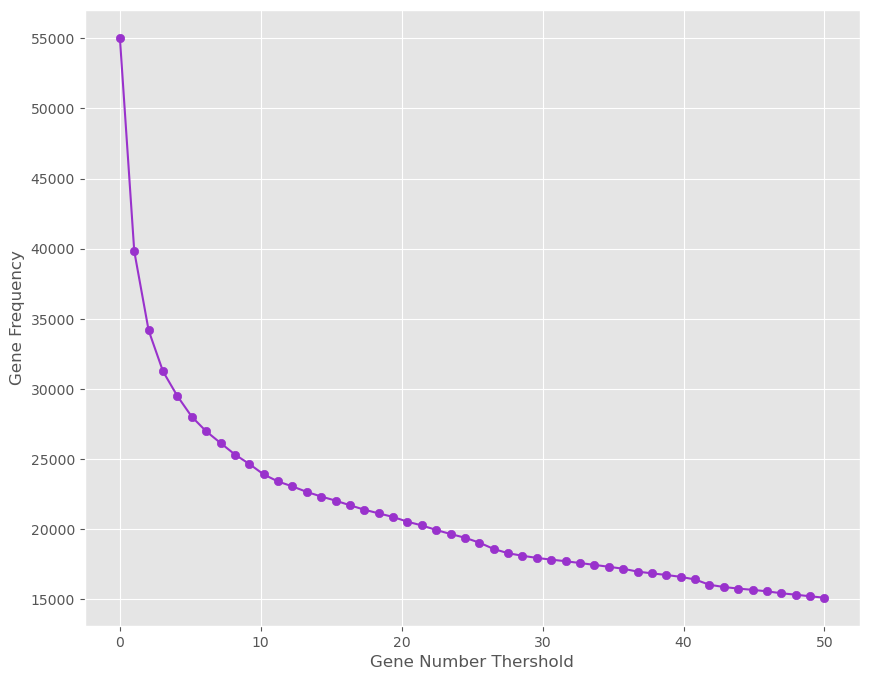

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(thresholds, threshold_data, color='darkorchid')
plt.plot(thresholds, threshold_data, color='darkorchid')
plt.xlabel("Gene Number Thershold")
plt.ylabel("Gene Frequency")
plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/gene_frequency_final.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [15]:
# large_data[row_sums >= 2]


In [21]:
frequency1 = data_without_lineage.sum(axis=1)
mean = np.mean(frequency1)
median = np.median(frequency1)
min_value = np.min(frequency1)
max_value = np.max(frequency1)

In [22]:
# data_without_lineage.sum(axis=1)

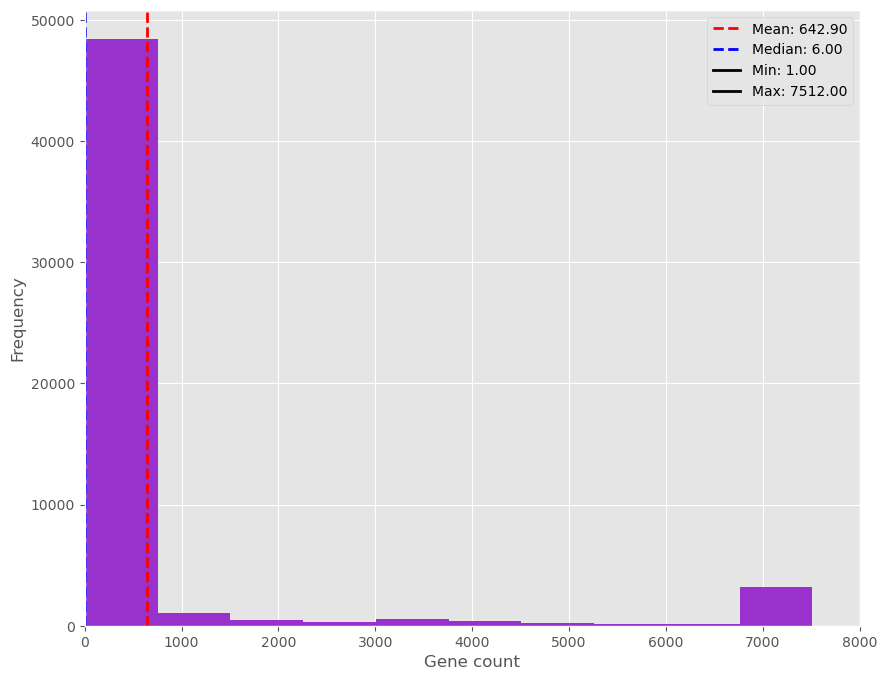

In [23]:
plt.figure(figsize=(10,8))
plt.hist(frequency1, color='darkorchid', bins=10)
# plt.scatter(frequency1[0], frequency1[1], color='darkorchid')
plt.xlim(0, 8000)
plt.xlabel('Gene count')
plt.ylabel('Frequency')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='b', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
dummy_min = plt.Line2D([], [], color='black',  linewidth=2, label=f'Min: {min_value:.2f}')
dummy_max = plt.Line2D([], [], color='black', linewidth=2, label=f'Max: {max_value:.2f}')

handles = [plt.Line2D([], [], color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}'),
        plt.Line2D([], [], color='b', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}'),
        dummy_min, dummy_max]
plt.legend(handles=handles)
plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/gene_count_final.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [19]:
frequency2 = data_without_lineage.sum(axis=0)
mean = np.mean(frequency2)
median = np.median(frequency2)
min_value = np.min(frequency2)
max_value = np.max(frequency2)

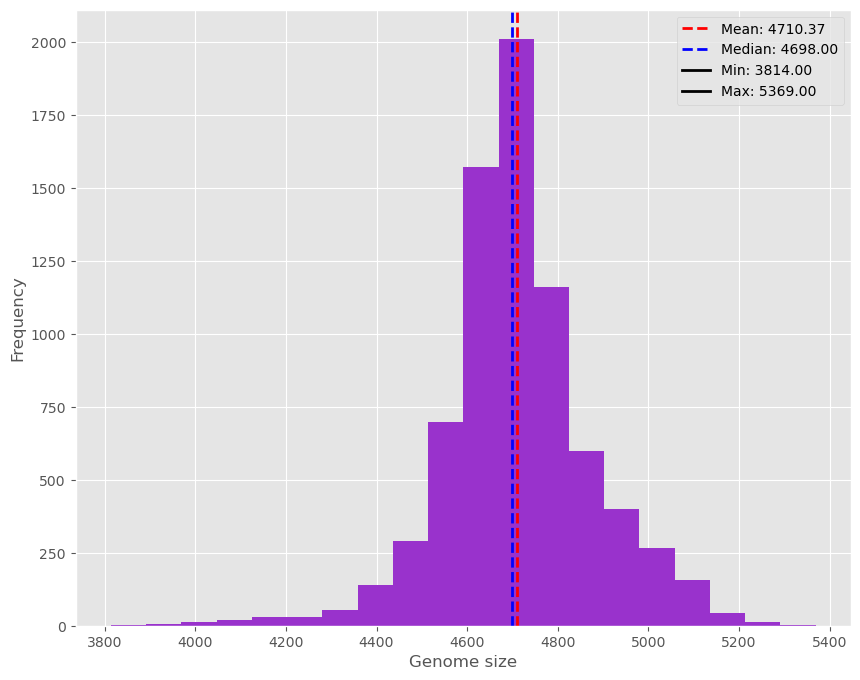

In [20]:
plt.figure(figsize=(10,8))
plt.hist(frequency2, bins=20, color='darkorchid')
plt.xlabel('Genome size')
plt.ylabel('Frequency')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='b', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
dummy_min = plt.Line2D([], [], color='black',  linewidth=2, label=f'Min: {min_value:.2f}')
dummy_max = plt.Line2D([], [], color='black', linewidth=2, label=f'Max: {max_value:.2f}')

handles = [plt.Line2D([], [], color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}'),
        plt.Line2D([], [], color='b', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}'),
        dummy_min, dummy_max]
plt.legend(handles=handles)
plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/genome_size_final.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
large_data.sum(0).min()

## 1.2) PCA

In [ ]:
# left join (number of samples stays the same but there are 1.5k damples with undetermined phylogroup)
# merged_df = data_without_lineage.transpose().merge(phylogroup_data, how='left', left_index=True, right_index=True)
# inner join (cuts down the number fo samples because overlooks the ones which do not have phylogroup determined)
merged_df = pd.merge(data_without_lineage.transpose(), phylogroup_data, how='inner', left_index=True, right_on='ID')

In [ ]:
merged_df

In [ ]:
merged_df.shape # Why does it decrease by so much? (inner join but still...)

In [ ]:
merged_df.iloc[:, :-1]

In [ ]:
merged_df['Phylogroup'] = merged_df['Phylogroup'].fillna('Not determined')

In [ ]:
merged_df['Phylogroup'].value_counts()

In [ ]:
# sum(merged_df.index == 'esc_pa2010aa_as')


In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(merged_df.iloc[:, :-1])
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = merged_df.Phylogroup.tolist(), data=df_pca)
# plt.savefig("figures/PCA_graph_BD_Phylogroup.pdf", format="pdf", bbox_inches="tight")
plt.show()

# 2) Data preprocessing

## 2.1) Dataset preprocessing 

In [ ]:
# data_without_lineage = large_data.drop(index=['Lineage'])
# merged_df = pd.merge(data_without_lineage.transpose(), phylogroup_data, how='inner', left_index=True, right_on='ID')


In [ ]:
# merged_df['Phylogroup'].value_counts()

In [ ]:
indices_df1 = set(data_without_lineage.transpose().index)
indices_df2 = set(phylogroup_data.index)

# Find common indices
common_indices = list(indices_df1.intersection(indices_df2))

In [ ]:
len(common_indices)

In [ ]:
# merged_df

In [ ]:
# merged_df['Phylogroup'].value_counts()

In [ ]:
data_array_t = np.array(merged_df.iloc[:, :-1])
phylogroups_array = np.array(merged_df.iloc[:, -1])

In [ ]:
data_array_t.sum(axis=1).min()

In [ ]:
data_array_t.shape

In [ ]:
phylogroups_array.shape

## 2.2) Conversing the dataset into splits and dataloaders

In [ ]:
data_array_t

In [ ]:
phylogroups_array

In [ ]:
# Convert to PyTorch tensor
data_tensor = torch.tensor(data_array_t, dtype=torch.float32)

# Split into train and test sets
train_data, temp_data, train_labels, temp_labels = train_test_split(data_tensor, phylogroups_array, test_size=0.3, random_state=12345)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.3333, random_state=12345)
test_phylogroups = test_labels

batch_size = 32

# TensorDataset
train_dataset = TensorDataset(train_data)
val_dataset = TensorDataset(val_data)
test_dataset = TensorDataset(test_data)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

# Dataloader for overfitting on one sample (for dubbiging purposes)
input_dim = data_array_t.shape[1]
binary_data = torch.tensor(np.random.randint(0, 2, size=(1, input_dim)), dtype=torch.float32)
single_sample_dataset = TensorDataset(binary_data)
single_sample_loader = DataLoader(single_sample_dataset, batch_size=1, shuffle=True)

# Dataloader fot a small subset for overfitting (again, for debugging)
small_subset_indices = np.random.choice(len(train_dataset), size=256, replace=False)
small_subset = Subset(train_dataset, small_subset_indices)
small_loader = DataLoader(small_subset, batch_size=batch_size, shuffle=True)


In [ ]:
test_data.shape

In [ ]:
genome_sizes = np.array(test_data.sum(axis=1))

In [ ]:
genome_sizes

In [ ]:
len(test_data.sum(axis=1))

# 3) Testing the model on one sample 

In [ ]:
# binary_data.type()

In [ ]:
# print(binary_data)

In [ ]:
# input_dim

In [ ]:
# binary_data.shape

In [ ]:
# # NO GRADIENT CLIPPING AND SCHEDULER 
# hidden_dim = 512
# latent_dim = 64
# beta_start = 0.1
# beta_end = 1.0
# n_epochs = 10
# input_dim = data_array_t.shape[1]

# # Loading the model
# model = VAE_single(input_dim, hidden_dim, latent_dim)

# # model = VAE_single(input_dim, hidden_dim, latent_dim)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# # Overfitting one sample to see if the model is broken 
# num_epochs = 100

# # Collecting data for visualisation 
# train_loss_vals1 = []
# train_loss_vals2 = []
# kl_divergences_no_beta = []
# kl_divergences_beta = []

# model.train()

# for epoch in range(num_epochs):
#     beta = beta_start + (beta_end - beta_start) * epoch / n_epochs
#     epoch_kl_divergence = 0
#     epoch_kl_divergence_beta = 0 
    
#     for data in single_sample_loader:
#         data = data[0].to(torch.float)
#         # print(data)
        
#         optimizer.zero_grad()
#         reconstruction, mu, logvar = model(data)
        
#         reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
#         # print(reconstruction_loss.item())
        
#         kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#         kl_divergence_loss_beta = beta * kl_divergence_loss
#         epoch_kl_divergence += kl_divergence_loss.item()
#         epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
#         # Total loss
#         loss = reconstruction_loss + kl_divergence_loss
#         loss2 = reconstruction_loss + kl_divergence_loss_beta
        
#         # Backpropagation
#         loss.backward()
#         optimizer.step()   

#     if epoch % 100 == 0:
#         print(f"Epoch {epoch}\nLoss (method1) = {loss.item()}\nLoss (method2) = {loss2.item()}")
#         print("----------------------------------")

#     train_loss_vals1.append(loss.item())
#     train_loss_vals2.append(loss2.item())

#     kl_divergences_no_beta.append(epoch_kl_divergence / len(single_sample_loader.dataset))
#     kl_divergences_beta.append(epoch_kl_divergence_beta / len(single_sample_loader.dataset))

# print(f"Final Loss after {num_epochs} epochs: {loss.item()}")

In [ ]:
# torch.save(model.state_dict(), "models/saved_single_sample_VAE_BD.pt")
# print("Model saved.")

In [ ]:
# # Load trained model 
# model = VAE_single(input_dim, hidden_dim, latent_dim)
# model.load_state_dict(torch.load('models/saved_single_sample_VAE_BD.pt'))  
# model.eval()  

# # Generate 10 new samples
# num_samples = 10 
# with torch.no_grad():
#     z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution (????)
#     generated_samples = model.decode(z).cpu().numpy() 

# threshold = 0.5
# binary_generated_samples = (generated_samples > threshold).astype(float)

# print("Generated samples:\n", binary_generated_samples)
# print("Generated samples:\n", generated_samples)

# 4) Testing the model on a bigger dataset (subset of train)

In [ ]:
# # Model inputs
# hidden_dim = 512
# latent_dim = 64
# beta_start = 0.1
# beta_end = 1.0
# n_epochs = 10
# input_dim = data_array_t.shape[1]

# # Loading the model
# model = VAE(input_dim, hidden_dim, latent_dim)

In [ ]:
# len(small_subset)

In [ ]:
# train_data.shape

In [ ]:
# val_data.shape

In [ ]:
# input_dim

In [ ]:
# input_dim = data_array_t.shape[1]
# hidden_dim = 512
# latent_dim = 64
# beta_start = 0.1
# beta_end = 1.0

# model = VAE(input_dim, hidden_dim, latent_dim)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# model.train()
# num_epochs = 100

# # train_loss_vals1 = []
# train_loss_vals2 = []
# # kl_divergences_no_beta = []
# kl_divergences_beta = []

# for epoch in range(num_epochs):
#     beta = beta_start + (beta_end - beta_start) * epoch / num_epochs
#     epoch_kl_divergence_beta = 0
#     for data in small_loader:
#         data = data[0].to(torch.float)
#         # print(data)
    
#         optimizer.zero_grad()
#         reconstruction, mu, logvar = model(data)
        
#         reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
#         # print(reconstruction_loss.item())

#         kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#         kl_divergence_loss_beta = beta * kl_divergence_loss
#         # epoch_kl_divergence += kl_divergence_loss.item()
#         epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
#         # Total loss
#         # loss = reconstruction_loss + kl_divergence_loss
#         loss2 = reconstruction_loss + kl_divergence_loss_beta
        
#         loss2.backward()
#         optimizer.step()   

#     if epoch % 100 == 0:
#         print(f"Epoch {epoch}\nLoss (method 2) = {loss2.item()}")
#         print("----------------------------------")

#     # train_loss_vals1.append(loss.item())
#     train_loss_vals2.append(loss2.item())

#     # kl_divergences_no_beta.append(epoch_kl_divergence / len(small_loader.dataset))
#     kl_divergences_beta.append(epoch_kl_divergence_beta / len(small_loader.dataset))

# print(f"Final Loss after {num_epochs} epochs: {loss2.item()}")

In [ ]:
# torch.save(model.state_dict(), "models/saved_small_VAE1_BD.pt")
# print("Model saved.")

# 5) Training of full dataset (train_full_dataset.py script on the CS account)

## 5.1) Full dataset (after hyperparameter tuning)

In [ ]:
hidden_dim = 1024
latent_dim = 64
input_dim = data_array_t.shape[1]

model = VAE_2(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('/Users/anastasiiashcherbakova/Desktop/2_bigdataset/7_all_genes_new_params/saved_KL_annealing_VAE_BD_100_AHPT.pt', map_location=torch.device('cpu')))  

In [ ]:
latents = get_latent_variables(model, test_loader, device)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['phylogroup'] = test_phylogroups

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
# plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = df_pca['phylogroup'], data=df_pca, ax=axes[0])
sns.scatterplot(x='PC2', y='PC3', hue = df_pca['phylogroup'], data=df_pca, ax=axes[1])
# plt.savefig("figures/pca_latent_space_full_dataset.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
for name, module in model.named_children():
    print(name)
    print(module)
    print("-------------------")

In [ ]:
model.eval()
all_recon_x = []
all_test_data = []

# Ploting the data into batches
with torch.no_grad():
    for batch in test_loader:
        batch_data = batch[0].to(device)
        recon_x, mu, logvar = model(batch_data)
        all_recon_x.append(recon_x.to(device))
        all_test_data.append(batch_data.to(device))

all_recon_x = torch.cat(all_recon_x)
all_test_data = torch.cat(all_test_data)

# Setting thershold 
recon_x_binarized = (all_recon_x > 0.5).int()

all_test_data_np = all_test_data.cpu().numpy().flatten()
recon_x_binarized_np = recon_x_binarized.cpu().numpy().flatten()

f1 = sklearn.metrics.f1_score(all_test_data_np, recon_x_binarized_np)
print(f'F1 Score: {f1:.2f}')

In [ ]:
# Calcualting F1 score for each sample (comapring the target to reconstruction)
f1_scores = []
for genome_x, genome in zip(recon_x_binarized.cpu(), all_test_data.cpu().int()):
    f1_scores.append(sklearn.metrics.f1_score(genome_x.numpy(), genome.numpy()))

# Ploting a histogram of all calculated F1 scores 
plt.figure(figsize=(10,8))
plt.hist(f1_scores, color='dodgerblue')
plt.xlabel("F1 score")
plt.ylabel("Frequency")
# plt.savefig("figures/f1_score_frequency_test_set_100_full_dataset.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
# Calcualting F1 score for each sample (comapring the target to reconstruction)
accuracy_scores = []
for genome_x, genome in zip(recon_x_binarized.cpu(), all_test_data.cpu().int()):
    accuracy_scores.append(sklearn.metrics.accuracy_score(genome_x.numpy(), genome.numpy()))

# Ploting a histogram of all calculated F1 scores 
plt.figure(figsize=(10,8))
plt.hist(accuracy_scores, color='dodgerblue')
plt.xlabel("Accuracy score")
plt.ylabel("Frequency")
# plt.savefig("figures/accuracy_score_frequency_test_set_100_full_dataset.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
recon_x_binarized.shape

In [ ]:
all_test_data.shape

# 6) Exploring genes which had the highest number of inccorect predictions

## 6.1) Findind out which genes have the most number of incorrect preditions + how many there are

In [ ]:
accuracy_scores_per_gene = []

num_genes = all_test_data.shape[1]
for gene_idx in range(num_genes):
    recontrustion = recon_x_binarized[:, gene_idx]
    target = all_test_data[:, gene_idx]
    accuracy_scores_per_gene.append(sklearn.metrics.accuracy_score(target, recontrustion))

In [ ]:
# Ploting a histogram of all calculated F1 scores 
plt.figure(figsize=(10,8))
plt.hist(accuracy_scores_per_gene, color='dodgerblue')
plt.xlabel("Accuracy score")
plt.ylabel("Frequency")
# plt.savefig("figures/accuracy_score_frequency_test_set_100_full_dataset.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
difference = np.array(recon_x_binarized) - np.array(all_test_data)
mistake_counts = np.sum(difference!=0, axis=0)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(mistake_counts, accuracy_scores_per_gene, color='dodgerblue')
plt.ylabel('Mistakes')
plt.xlabel('Accuracy score')
# plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/scatter_mistakes_and_accuracy.pdf", format="pdf", bbox_inches="tight")

In [ ]:
gene_abundance = all_test_data.sum(axis=0)

In [ ]:
all_test_data.sum(axis=0)


In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(accuracy_scores_per_gene, gene_abundance, color='dodgerblue')
plt.ylabel('Abudance')
plt.xlabel('Accuracy score')
# plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/scatter_final_gene_abundance_and_accuracy.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
most_mistakes_column_index = np.argmax(mistake_counts)
most_mistakes_count = mistake_counts[most_mistakes_column_index]

In [ ]:
most_mistakes_column_index

In [ ]:
most_mistakes_count

In [ ]:
print(f"Mistake counts per gene: {mistake_counts}")
print(f"Column with the most mistakes: {most_mistakes_column_index} (Count: {most_mistakes_count})")

## 6.2) Plotting a figure of number of mistakes vs frequency

In [ ]:
threshold_data = []
thresholds = np.linspace(0, 200, num=200)

for i in thresholds:
    threshold_data.append(sum(mistake_counts >= i))

In [ ]:
threshold_data

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(thresholds, threshold_data, color='dodgerblue')
plt.plot(thresholds, threshold_data, color='dodgerblue')
plt.xlabel("Misidentified count")
plt.ylabel("Frequency")
# plt.savefig('figures/mistakes_frequency.pdf', format="pdf", bbox_inches="tight")

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(thresholds, threshold_data, color='dodgerblue')
plt.plot(thresholds, threshold_data, color='dodgerblue')
plt.xlabel("Misidentified count")
plt.ylabel("Frequency")
plt.ylim(-1, 20)
# plt.savefig('figures/mistakes_frequency_close_up.pdf', format="pdf", bbox_inches="tight")

# 7) PCAs for dataset metadata (7 in total)

## 7.1) PHylogroups and geneome size

In [ ]:
latents = get_latent_variables(model, test_loader, device)
pca = PCA(n_components=7)
data_pca = pca.fit_transform(latents)

num_plots = 6
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.flatten()

for i in range(num_plots+1):
    if i == num_plots:
        break
    col1 = 'PC'+str(i+1)
    col2 = 'PC'+str(i+2)
    df_pca = pd.DataFrame(data_pca[:, i:i+2], columns=[col1, col2])
    df_pca['Phylogroup'] = test_phylogroups

    ax = axes[i]

    # plt.figure(figsize=(10, 10))
    sns.scatterplot(x=col1, y=col2, hue = df_pca['Phylogroup'], data=df_pca, ax=ax, legend=False)
    if i == 0:
            scatter = sns.scatterplot(x=col1, y=col2, hue=df_pca['Phylogroup'], data=df_pca, ax=ax, legend='brief')
            handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()

fig.legend(handles, labels, loc='center right', title='Phylogroup')

plt.tight_layout()
plt.show()

In [ ]:
latents = get_latent_variables(model, test_loader, device)
pca = PCA(n_components=7)
data_pca = pca.fit_transform(latents)

num_plots = 6
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.flatten()

for i in range(num_plots+1):
    if i == num_plots:
        break
    col1 = 'PC'+str(i+1)
    col2 = 'PC'+str(i+2)
    df_pca = pd.DataFrame(data_pca[:, i:i+2], columns=[col1, col2])
    df_pca['Genome size'] = genome_sizes

    ax = axes[i]

    # plt.figure(figsize=(10, 10))
    sns.scatterplot(x=col1, y=col2, hue = df_pca['Genome size'], data=df_pca, ax=ax, legend=False)
    # plt.savefig('figures/pca_latent_space_genome_size_visualisation_BD_100_AHPT_7PCs.pdf', format="pdf", bbox_inches="tight")

    if i == 0:
            scatter = sns.scatterplot(x=col1, y=col2, hue=df_pca['Genome size'], data=df_pca, ax=ax, legend='brief')
            handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()

fig.legend(handles, labels, loc='center right', title='Genome size')

plt.tight_layout()
plt.show()

In [ ]:
metadata = pd.read_csv(TEN_K_DATASET_METADATA, index_col=[0], header=[0])

In [ ]:
metadata

In [ ]:
# merged_df_2

In [ ]:
filtered_data_2 = pd.merge(data_without_lineage.transpose(), metadata, how='inner', left_index=True, right_on='ID')

In [ ]:
filtered_data_2

In [ ]:
filtered_data = filtered_data_2.copy()
filtered_data['Source'] = filtered_data_2['Source'] 
filtered_data['Num_CDSs'] = pd.Series(filtered_data_2['Num_CDSs'], dtype='int64')
filtered_data['Num_contigs'] = pd.Series(filtered_data_2['Num_contigs'], dtype='int64')
filtered_data['MDR'] = filtered_data_2['MDR']
filtered_data['Pathotype'] = filtered_data_2['Pathotype']
filtered_data['Phylogroup'] = filtered_data_2['Phylogroup']


In [ ]:
# Cleaning up the data
filtered_data_2['Total_AMR_genes'] = pd.to_numeric(filtered_data_2['Total_AMR_genes'].replace({'?': None, 'Unknown': None}), errors='coerce').fillna(0).astype('int64')
filtered_data_2['Total_virulence_genes'] = pd.to_numeric(filtered_data_2['Total_virulence_genes'].replace({'?': None, 'dfrA14_1_KF921535;sul1_2_U12338;blaKPC_2_1_AY034847;blaTEM_1B_1_AY458016;sul2_2_AY034138;ere_A__2_AF099140;mdf_A__1_Y08743;aac_6___IIc_1_NC_012555;blaSHV_12_1_KF976405;mph_A__1_D16251': None}), errors='coerce').fillna(0).astype('int64')


filtered_data['Total_AMR_genes'] = pd.Series(filtered_data_2['Total_AMR_genes'], dtype='int64')
filtered_data['Total_virulence_genes'] = pd.Series(filtered_data_2['Total_virulence_genes'], dtype='int64')

In [ ]:
filtered_data.dtypes[7580:]

In [ ]:
total_virulence_genes_array = np.array(filtered_data.iloc[:, -1])

In [ ]:
len(total_virulence_genes_array)

In [ ]:
total_virulence_genes_array2 = np.array(filtered_data['Total_virulence_genes'])

In [ ]:
len(total_virulence_genes_array2)

In [ ]:
print(filtered_data['Num_CDSs'].min())
print(filtered_data['Num_CDSs'].max())
print(filtered_data['Num_CDSs'].median())
print(filtered_data['Num_CDSs'].mean())

In [ ]:
filtered_data

In [ ]:
data_tensor = torch.tensor(np.array(filtered_data.iloc[:, :-8]), dtype=torch.float32)

In [ ]:
data_tensor.shape

In [ ]:
target_array = np.array(filtered_data['Num_contigs'])

In [ ]:
target_array.shape

## 7.2) PCA of 7 chosen metadata characteristics

In [ ]:
arrays = ['Source','Num_CDSs', 'Num_contigs', 'MDR', 'Pathotype', 'Phylogroup', 'Total_AMR_genes', 'Total_virulence_genes']

for array in arrays:
    target_array = np.array(filtered_data[array])
    train_data, temp_data, train_labels, temp_labels = train_test_split(data_tensor, target_array, test_size=0.3, random_state=12345)
    val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.3333, random_state=12345)
    
    test_dataset = TensorDataset(test_data)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    latents = get_latent_variables(model, test_loader, device)
    pca = PCA(n_components=7)
    data_pca = pca.fit_transform(latents)

    num_plots = 6
    fig, axes = plt.subplots(2, 3, figsize=(20, 15))
    axes = axes.flatten()

    handles = []
    labels = []

    for i in range(num_plots):
        col1 = 'PC' + str(i + 1)
        col2 = 'PC' + str(i + 2)
        df_pca = pd.DataFrame(data_pca[:, i:i + 2], columns=[col1, col2])
        df_pca[array] = test_labels

        ax = axes[i]

        scatter = sns.scatterplot(x=col1, y=col2, hue=df_pca[array], data=df_pca, ax=ax, legend=False)

        if i == 0:
            scatter = sns.scatterplot(x=col1, y=col2, hue=df_pca[array], data=df_pca, ax=ax, legend='brief')
            handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()

    fig.legend(handles, labels, loc='center right', title=array)
    # plt.savefig('figures/pca_latent_space_'+array+'_size_visualisation_BD_100_AHPT_7PCs.pdf', format="pdf", bbox_inches="tight")

    plt.tight_layout()
    plt.show()


# 8) Exploring the genetic distance and latent space distance of lineages using mantel test

In [ ]:
merged_d_3 = pd.merge(large_data.transpose(), phylogroup_data, how='inner', left_index=True, right_on='ID')

In [ ]:
merged_d_3.dtypes

In [ ]:
merged_d_3['Lineage'] = merged_d_3['Lineage'].astype(object)

In [ ]:
merged_d_3.dtypes

In [ ]:
numeric_cols = merged_d_3.select_dtypes(include='number')
column_sums = numeric_cols.sum(axis=0)

filtered_columns = column_sums[column_sums / 7512 >= 0.05].index
filtered_data = merged_d_3[filtered_columns]

filtered_data = merged_d_3[filtered_columns].copy()

In [ ]:
filtered_data

In [ ]:
filtered_data['Phylogroup'] = merged_d_3['Phylogroup']
filtered_data['Lineage'] = merged_d_3['Lineage']

In [ ]:
filtered_data

In [ ]:
data_array_t = np.array(filtered_data.iloc[:, :-2])
lineages_array = np.array(filtered_data.iloc[:, -1])

In [ ]:
lineages_array

## Lineage PCA

In [ ]:
large_data.transpose()

In [ ]:
data_array_t = np.array(large_data.transpose().iloc[:, 1:])
lineages_array = np.array(large_data.transpose().iloc[:, 0])

data_tensor = torch.tensor(data_array_t, dtype=torch.float32)

train_data, temp_data, train_labels, temp_labels = train_test_split(data_tensor, lineages_array, test_size=0.3, random_state=12345)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.3333, random_state=12345)

batch_size = 32

# TensorDataset
train_dataset = TensorDataset(train_data)
val_dataset = TensorDataset(val_data)
test_dataset = TensorDataset(test_data)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

latents = get_latent_variables(model, test_loader, device)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Lineage'] = test_labels

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
# plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = df_pca['Lineage'], data=df_pca, ax=axes[0])
sns.scatterplot(x='PC2', y='PC3', hue = df_pca['Lineage'], data=df_pca, ax=axes[1])
# plt.savefig('figures/pca_latent_space_lineage.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
df_pca

In [ ]:
tree = Phylo.read("/Users/anastasiiashcherbakova/git_projects/masters_project/data/tree_50.nwk", "newick")
terminals = tree.get_terminals()
tree_lineages = np.array([t.name for t in terminals]).astype(object)
pca_lineages = df_pca['Lineage'].unique()

# common_lineages = set(tree_lineages).intersection(set(pca_lineages))

# Group by 'Lineage' and calculate the mean of 'PC1' and 'PC2' for each lineage
average_positions = df_pca.groupby('Lineage')[['PC1', 'PC2']].mean()

# Compute the pairwise distance matrix
distance_matrix = pairwise_distances(average_positions, metric='euclidean')

# Convert the distance matrix to a DataFrame for better readability
# Use the Lineage names as the index and column names
distance_df_PCA = pd.DataFrame(distance_matrix, index=average_positions.index, columns=average_positions.index)

# Save the distance matrix to a CSV file (optional)
distance_df_PCA.to_csv("/Users/anastasiiashcherbakova/git_projects/masters_project/data/pca_genetic_distance_matrix.csv")

In [ ]:
distance_df_PCA

In [ ]:
tree_lineages

In [ ]:
pca_lineages

In [ ]:
Phylo.draw(tree, do_show=False)
plt.show()

### working with lineages

In [ ]:
terminals = tree.get_terminals()

num_leaves = len(terminals)
distance_matrix = np.zeros((num_leaves, num_leaves))

for i, term1 in enumerate(terminals):
    for j, term2 in enumerate(terminals):
        if i != j:
            distance = tree.distance(term1, term2)
            distance_matrix[i, j] = distance
        else:
            distance_matrix[i, j] = 0 

distance_df = pd.DataFrame(distance_matrix, index=[t.name for t in terminals], columns=[t.name for t in terminals])

distance_df.index = distance_df.index.astype(int)
distance_df.columns = distance_df.columns.astype(int)
distance_df_tree = distance_df.loc[pca_lineages, pca_lineages]
distance_df_tree = distance_df_tree.sort_index(axis=0).sort_index(axis=1)


distance_df_tree.to_csv("/Users/anastasiiashcherbakova/git_projects/masters_project/data/genetic_distance_matrix.csv")

In [ ]:
distance_df_tree

In [ ]:

# # Load the previously saved distance matrices
# distance_df_pca = pd.read_csv("data/pca_genetic_distance_matrix.csv", index_col=0)
# distance_df_tree_common = pd.read_csv("data/genetic_distance_matrix.csv", index_col=0)

# Convert the DataFrames to numpy arrays
distance_matrix_pca = distance_df_PCA.values
distance_matrix_tree = distance_df_tree.values

# Perform the Mantel test
result = mantel.test(distance_matrix_pca, distance_matrix_tree, perms=999, method='pearson', tail='upper')

# Print the results
print(f"Mantel test correlation: {result}")
print(f"P-value: {result.p}")

# Interpret the results
if result.p < 0.05:
    print("The correlation between the two distance matrices is statistically significant.")
else:
    print("The correlation between the two distance matrices is not statistically significant.")


In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(np.array(distance_df_PCA).flatten(), np.array(distance_df_tree).flatten(), color='dodgerblue')
plt.xlabel('Distances (PCA)')
plt.ylabel('Distances (Tree)')
# plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/scatter_final_plot_distances.pdf", format="pdf", bbox_inches="tight")
plt.grid(True)
plt.show()

# 9) Generation of new genomes from the models latent space

In [ ]:
data_array_t = np.array(merged_df.iloc[:, :-1])
phylogroups_array = np.array(merged_df.iloc[:, -1])

In [ ]:
# Convert to PyTorch tensor
data_tensor = torch.tensor(data_array_t, dtype=torch.float32)

# Split into train and test sets
train_data, temp_data, train_labels, temp_labels = train_test_split(data_tensor, phylogroups_array, test_size=0.3, random_state=12345)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.3333, random_state=12345)
test_phylogroups = test_labels

batch_size = 32

# TensorDataset
train_dataset = TensorDataset(train_data)
val_dataset = TensorDataset(val_data)
test_dataset = TensorDataset(test_data)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
latents = get_latent_variables(model, test_loader, device)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['phylogroup'] = test_phylogroups

# Plot the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = df_pca['phylogroup'], data=df_pca)
# plt.savefig("figures/pca_latent_space_visualisation_full_dataset_test_set.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
latents = get_latent_variables(model, train_loader, device)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['phylogroup'] = train_labels


In [ ]:
# Plot the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = df_pca['phylogroup'], data=df_pca)
# plt.savefig("figures/pca_latent_space_visualisation_full_dataset_train_set.pdf", format="pdf", bbox_inches="tight")
plt.show()

## 9.1) Sparse latent sampling

In [ ]:
# # k = 8
# latents = get_latent_variables(model, test_loader, device)

# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(latents)

#     cluster_centers = kmeans.cluster_centers_

#     num_samples_per_cluster = 1000

#     sparse_samples = []
#     for center in cluster_centers:
#         with torch.no_grad():
#             noise = np.random.normal(loc=0, scale=0.1, size=(num_samples_per_cluster, latent_dim))  # Adjust noise level as needed
#             z_samples = center + noise
#             z_samples = torch.tensor(z_samples, dtype=torch.float32)
#             # print(z_samples.dtype)
#             # print(z_samples.shape)
#             generated_samples = model.decode(z_samples).cpu().numpy()
#             sparse_samples.extend(generated_samples)

#     sparse_samples = np.array(sparse_samples)

#     print("Sparse samples generated:")
#     print(sparse_samples)

#     threshold = 0.5
#     binary_sparse_samples = (sparse_samples > threshold).astype(float)

#     plt.figure(figsize=(10,10))
#     plt.hist(binary_sparse_samples.sum(axis=1), bins=100, color='dodgerblue')
#     plt.xlabel('Genome size')
#     plt.ylabel('Frequency')


In [ ]:
# plt.figure(figsize=(10,10))
# plt.hist(binary_sparse_samples.sum(axis=1), bins=100, color='dodgerblue')
# plt.xlabel('Genome size')
# plt.ylabel('Frequency')
# plt.savefig("figures/sparse_sampling.pdf", format="pdf", bbox_inches="tight")

## 9.2) Random sampling from latent space

In [ ]:
state_dict = torch.load('/Users/anastasiiashcherbakova/Desktop/2_bigdataset/7_all_genes_new_params/saved_KL_annealing_VAE_BD_100_AHPT.pt', map_location=torch.device('cpu'))
print(state_dict.keys())

In [ ]:
# Load trained model 
input_dim = 55039
hidden_dim = 1024
latent_dim = 64

# changes layer norm layer to batch norm layer and 
model = VAE_2(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('/Users/anastasiiashcherbakova/Desktop/2_bigdataset/7_all_genes_new_params/saved_KL_annealing_VAE_BD_100_AHPT.pt',  map_location=torch.device('cpu')))  
model.eval()  

# Generate 10 new samples
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution because the latent space follows normal distribution 
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples (binary):\n", binary_generated_samples)
print("\n")
print("Generated samples (sigmoid function output):\n", generated_samples)


In [ ]:
binary_generated_samples.sum(axis=1).min()

In [ ]:
total_ones = np.sum(binary_generated_samples, axis=1)
min_ones_index = np.argmin(total_ones)

In [ ]:
total_ones

In [ ]:
total_ones[min_ones_index]

In [ ]:
latent_distances = np.linalg.norm(generated_samples - generated_samples[min_ones_index], axis=1)

closest_latent_index = np.argmin(latent_distances)

print(f"Closest latent vector (z): {z[closest_latent_index]}")
print(f"Generated sample from closest latent vector:\n {generated_samples[closest_latent_index]}")

In [ ]:
z_of_interest = z[closest_latent_index] 
z_of_interest_tensor = torch.tensor(z_of_interest).unsqueeze(0)  

noise_std = 0.1

num_additional_samples = 1000  
with torch.no_grad():
    noise = torch.randn(num_additional_samples, latent_dim) * noise_std
    z_samples = z_of_interest_tensor + noise
    additional_generated_samples = model.decode(z_samples).cpu().numpy()


print("Additional generated samples:")
print(additional_generated_samples)

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(binary_generated_samples.sum(axis=1), bins=10, color='dodgerblue')
plt.xlabel('Genome size')
plt.ylabel('Frequency')
# plt.savefig("figures/sampling_10000_genome_size_distribution.pdf", format="pdf", bbox_inches="tight")

In [ ]:
binary_generated_samples.sum(axis=1).min()

In [ ]:
np.mean(binary_generated_samples.sum(axis=1))

In [ ]:
np.median(binary_generated_samples.sum(axis=1))

## 9.3) Emphisising on a specific minimal genome region 

In [ ]:
threshold = 0.5
binary_additional_generated_samples = (additional_generated_samples > threshold).astype(float)

print("Generated samples (binary):\n", binary_additional_generated_samples)
print("\n")
print("Generated samples (sigmoid function output):\n", additional_generated_samples)

In [ ]:
binary_additional_generated_samples.sum(axis=1).min()

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(binary_additional_generated_samples.sum(axis=1), bins=10, color='dodgerblue')
plt.xlabel('Genome size')
plt.ylabel('Frequency')
# plt.savefig("figures/sampling_small_genomes.pdf", format="pdf", bbox_inches="tight")

## 9.4) Grid sampling 

In [ ]:
grid_size = 3
scale = 21.0

x = np.linspace(-scale, scale, grid_size)
y = np.linspace(-scale, scale, grid_size)
xx, yy = np.meshgrid(x, y)
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=-1)
grid_points = torch.tensor(grid_points, dtype=torch.float32)
    

In [ ]:
grid_points

In [ ]:
new_high_dim_grid_points = pca.inverse_transform(grid_points)

new_high_dim_grid_points = torch.tensor(new_high_dim_grid_points, dtype=torch.float32)

with torch.no_grad():
    generated_samples = model.decode(new_high_dim_grid_points).cpu().numpy()

In [ ]:
threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples (binary):\n", binary_generated_samples)
print("\n")
print("Generated samples (sigmoid function output):\n", generated_samples)

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(binary_generated_samples.sum(axis=1), bins=100, color='dodgerblue')
plt.xlabel('Genome size')
plt.ylabel('Frequency')
# plt.savefig("figures/sampling_grid_genome_size_distribution.pdf", format="pdf", bbox_inches="tight")

In [ ]:
binary_generated_samples.sum(axis=1).min()